# Support Vector Machines

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

## 1. Support Vector Machines

**Task 1**  
- Run the code to see two graphs appear. 
- Right now they should be identical. 
- We’re going to fix the bottom graph so it has a good decision boundary.
- Why is this decision boundary bad?

<br>

**Task 2**  
- Let’s shift the line on the bottom graph to make it separate the two clusters.
- The slope of the line looks pretty good, so let’s keep that at `-2`.
- We want to move the boundary up, so change `intercept_two` so the line separates the two clusters.

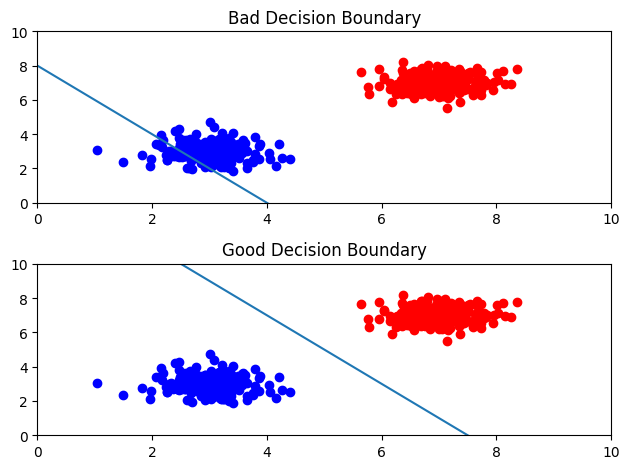

In [9]:
# Data
x_1 = np.random.normal(3, 0.5, 200)
y_1 = np.random.normal(3, 0.5, 200)

x_2 = np.random.normal(7, 0.5, 200)
y_2 = np.random.normal(7, 0.5, 200)


#Top graph intercept and slope
ax = plt.subplot(2, 1, 1)
plt.title('Bad Decision Boundary')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.scatter(x_1, y_1, color = "b")
plt.scatter(x_2, y_2, color = "r")

intercept_one = 8
slope_one = -2

x_vals = np.array(ax.get_xlim())
y_vals = intercept_one + slope_one * x_vals
plt.plot(x_vals, y_vals, '-')


#Bottom Graph
ax = plt.subplot(2, 1, 2)
plt.title('Good Decision Boundary')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.scatter(x_1, y_1, color = "b")
plt.scatter(x_2, y_2, color = "r")

#Change the intercept to separate the clusters
intercept_two = 15
slope_two = -2

x_vals = np.array(ax.get_xlim())
y_vals = intercept_two + slope_two * x_vals
plt.plot(x_vals, y_vals, '-')

plt.tight_layout()
plt.show()

## 2. Optimal Decision Boundaries

**Task 1**  
- Run the code. Both graphs have suboptimal decision boundaries. 
- Why? We’re going to fix the bottom graph.

<br>

**Task 2**  
- We’re going to have to make the decision boundary much flatter, which means we first need to lower its y-intercept. 
- Change `intercept_two` to be `8`.

<br>

**Task 3**  
- Next, we want the slope to be pretty flat. 
- Change the value of `slope_two`. 
- The resulting line should split the two clusters.

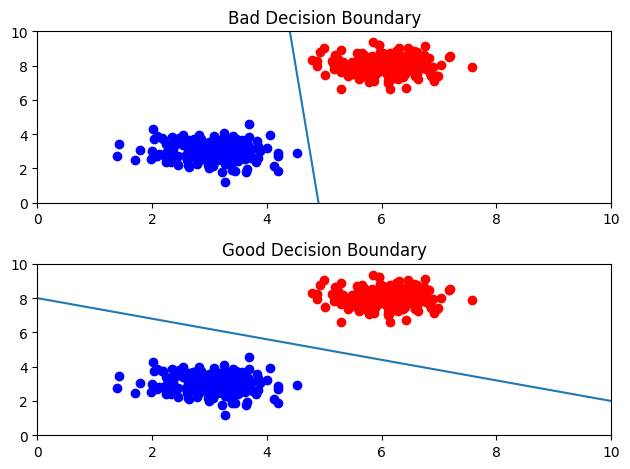

In [22]:
# Data
x_1 = np.random.normal(3, 0.5, 200)
y_1 = np.random.normal(3, 0.5, 200)

x_2 = np.random.normal(6, 0.5, 200)
y_2 = np.random.normal(8, 0.5, 200)


#Top graph intercept and slope
ax = plt.subplot(2, 1, 1)
plt.title('Bad Decision Boundary')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.scatter(x_1, y_1, color = "b")
plt.scatter(x_2, y_2, color = "r")

intercept_one = 98
slope_one = -20

x_vals = np.array(ax.get_xlim())
y_vals = intercept_one + slope_one * x_vals
plt.plot(x_vals, y_vals, '-')


#Bottom graph
ax = plt.subplot(2, 1, 2)
plt.title('Good Decision Boundary')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.scatter(x_1, y_1, color = "b")
plt.scatter(x_2, y_2, color = "r")

#Bottom graph intercept and slope
intercept_two = 8
slope_two = -0.6

x_vals = np.array(ax.get_xlim())
y_vals = intercept_two + slope_two * x_vals
plt.plot(x_vals, y_vals, '-')

plt.tight_layout()
plt.show()


## 3. Support Vectors and Margins

**Task 1**  
- What are the support vectors for the SVM plot? There should be 2 blue support vectors and 1 red support vector.
- Finish defining `red_support_vector`, `blue_support_vector_one`, and `blue_support_vector_two`. 
- Set them equal to the correct points. 
- The point should be represented as a list like `[1, 0.5]`.

<br>

**Task 2**  
- What is the size of the margin? 
- Find the total distance between a support vector and the line by looking at the plot. 
- Create a variable named `margin_size` and set it equal to the correct number.

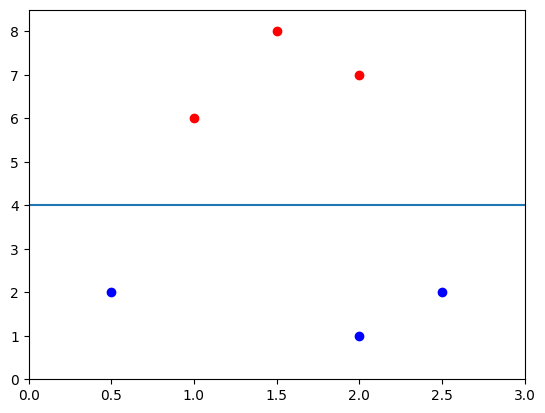

In [34]:
# Data
x_1 = [1, 1.5, 2]
y_1 = [6, 8, 7]

x_2 = [0.5, 2, 2.5]
y_2 = [2, 1, 2]

plt.scatter(x_1, y_1, color = "r")
plt.scatter(x_2, y_2, color = "b")
plt.hlines(4, 0, 3)
plt.xlim(0, 3)
plt.ylim(0, 8.5)
ax = plt.gca()
ax.set_xticks(np.arange(0, 3.5, 0.5))
ax.set_yticks(np.arange(0, 8.5, 1))
plt.show()

In [31]:
red_support_vector = [1, 6]
blue_support_vector_one = [0.5, 2]
blue_support_vector_two = [2.5, 2]
margin_size = 2

## 4. scikit-learn

**Task 1**  
- Let’s start by making a `SVC` object with `kernel = 'linear'`.
- Name the object `classifier`.

<br>

**Task 2**  
- We’ve imported the training set and labels for you. 
- Call `classifier`‘s .`fit()` method using `points` and `labels` as parameters.

<br>

**Task 3**  
- We can now classify new points. Try classifying both `[3, 4]` and `[6, 7]`. 
- Remember, the `.predict()` function expects a list of points to predict.
- Print the results.

In [35]:
from graph import points, labels

In [39]:
# Task 1
classifier = SVC(kernel = 'linear')

# Task 2
classifier.fit(points, labels)

# Task 3
classifier.predict([[3, 4], [6, 7]])

array([0, 1])

## 5. Outliers

**Task 1**  
- Run the code to see the SVM’s current boundary line. 
- Note that we’ve imported some helper functions we wrote named `draw_points` and `draw_margins` to help visualize the SVM.

<br>

**Task 2**  
- Let’s add an outlier! 
- Before calling `.fit()`, `append` `[3, 3] `to points and `append` `0` to `labels`. 
- This will add a blue point at `[3, 3]`

<br>

**Task 3**  
- Right now, our classifier has hard margins because `C = 1`. 
- Change the value of `C` to `0.01` to see what the SVM looks like with soft margins.

<br>

**Task 4**  
- `append` at least two more points to `points`. 
- If you want the points to appear on the graph, make sure their x and y values are between `0` and `12`.
- Make sure to also `append` a label to `labels` for every point you add. 
- A `0` will make the point blue and a `1` will make the point red.
- Make sure to add the points before training the SVM.

<br>

**Task 5**  
- Play around with the `C` variable to see how the decision boundary changes with your new points added. 
- Change `C` to be a value between `0.01` and `1`.

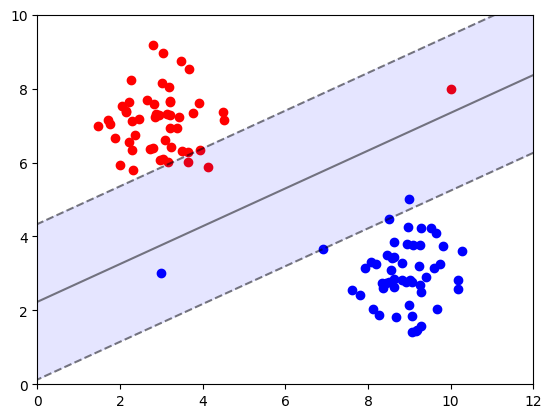

In [16]:
from graph import points_2, labels_2

def draw_points(X, y):
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = "r")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color = "b")
    plt.xlim(0, 12)
    plt.ylim(0, 10)


def draw_margin(cls):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = cls.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.contourf(XX, YY, Z, levels=[-1, 1], alpha=0.1, colors=['b'])

# Task 2 / 4
points_2 = np.append(points_2, [[3, 3], [9, 5], [10, 8]], axis = 0)
labels_2 = np.append(labels_2, [0, 0, 1])

classifier = SVC(kernel='linear', C = 0.05)    # Task 3 / 5
classifier.fit(points_2, labels_2)

draw_points(points_2, labels_2)
draw_margin(classifier)
plt.show()

## 6. Kernels

**Task 1**  
- Let’s take a look at the power of kernels. 
- We’ve created a dataset that isn’t linearly separable and split it into a training set and a validation set.
- Create an `SVC` named `classifier` with a `'linear'` kernel.

<br>

**Task 2**  
- Call the `.fit()` method using `training_data` and `training_labels` as parameters.

<br>

**Task 3**  
- Let’s see how accurate our classifier is using a linear kernel.
- Call `classifier`‘s `.score()` function using `validation_data` and `validation_labels` as parameters. Print the results.
- This will print the average accuracy of the model.

<br>

**Task 4**  
- That’s pretty bad! 
- The classifier is getting it right less than 50% of the time! 
- Change `'linear'` to `'poly'` and add the parameter `degree = 2`. 
- Run the program again and see what happens to the score.

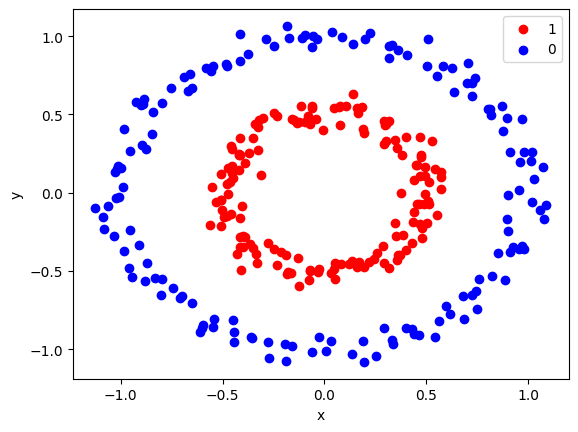

In [13]:
from graph import points_3, labels_3

training_data, validation_data, training_labels, validation_labels = train_test_split(
    points_3, labels_3, train_size = 0.8, test_size = 0.2, random_state = 100
)

plt.scatter(points_3[labels_3 == 1][:, 0], points_3[labels_3 == 1][:, 1], color = "r")
plt.scatter(points_3[labels_3 == 0][:, 0], points_3[labels_3 == 0][:, 1], color = "b")
plt.legend(["1", "0"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [10]:
# Task 1
classifier = SVC(kernel = 'linear')

# Task 2
classifier.fit(training_data, training_labels)

# Task 3
classifier.score(validation_data, validation_labels)

0.43333333333333335

In [11]:
# Task 4
classifier = SVC(kernel = 'poly', degree = 2)
classifier.fit(training_data, training_labels)
classifier.score(validation_data, validation_labels)

1.0

## 7. Polynomial Kernel

**Task 1**  
- In this exercise, we will be using a non-linearly separable dataset similar to the concentric circles above.
- Rather than using a polynomial kernel, we’re going to stick with a linear kernel and do the transformation ourselves. 
- The SVM running a linear kernel on the transformed points should perform identically to the SVM running a polynomial kernel on the original points.
- To begin, at the bottom of your code, print `training_data[0]` to see the first data point. 
- You will also see the accuracy of the SVM when the data is not projected into 3 dimensions.

<br>

**Task 2**  
- Let’s transform the data into three dimensions! 
- Begin by creating two empty lists called `new_training` and `new_validation`.

<br>

**Task 3**  
- Loop through every point in `training_data`. 
- For every point, append a list to `new_training`. 
- The list should contain three numbers:
    - The square root of `2` times `point[0]` times `point[1]`.
    - `point[0]` squared.
    - `point[1]` squared.
- Remember, to square a number in Python do `number ** 2`. 
- To take the square root, do `number ** 0.5`.

<br>

**Task 4**  
- Do the same for every point in `validation_data`. 
- For every point in `validation_data`, add the new list to `new_validation`.

<br>

**Task 5**  
- Retrain `classifier` by calling the .`fit()` method using `new_training` and `training_labels` as parameters.

<br>

**Task 6**  
- Finally, run `classifier`‘s `.score()` method using `new_validation` and `validation_labels` as parameters.
-  Print the results. 
- How did the SVM do when the data was projected to three dimensions?

In [ ]:
#Makes concentric circles
points, labels = make_circles(n_samples=300, factor=.2, noise=.05, random_state = 1)

#Makes training set and validation set.
training_data, validation_data, training_labels, validation_labels = train_test_split(
    points, labels, train_size = 0.8, test_size = 0.2, random_state = 100
)

classifier = SVC(kernel = "linear", random_state = 1)
classifier.fit(training_data, training_labels)
classifier.score(validation_data, validation_labels)

0.5666666666666667

In [19]:
# Task 1
print(training_data[0])

# Task 2
new_training = []
new_validation = [] 

# Task 3
for x, y in training_data:
    new_training.append([2**0.5 * x * y, x**2, y**2])

# Task 4
for x, y in validation_data:
    new_validation.append([2**0.5 * x * y, x**2, y**2])

# Task 5
classifier.fit(new_training, training_labels)

# Task 6
classifier.score(new_validation, validation_labels)

[0.31860062 0.11705731]


1.0

## 8. Radial Basis Function Kernel

**Task 1**  
- We’re going to be using a rbf kernel to draw a decision boundary for the following plot (seeing below in the code).
- We’ve imported the data for you and split it into `training_data`, `validation_data`, `training_labels`, and `validation_labels`.
- Begin by creating an `SVC` named classifier with an `"rbf"` kernel. 
- Set the kernel’s `gamma` equal to `1`.

<br>

**Task 2**  
- Next, train the model using the `.fit()` method using `training_data` and `training_labels` as parameters.

<br>

**Task 3**  
- Let’s test the classifier’s accuracy when its gamma is `1`. 
- Print the result of the `.score()` function using `validation_data` and `validation_labels` as parameters.

<br>

**Task 4**  
- Let’s see what happens if we increase `gamma`. 
- Change `gamma` to `10`. What happens to the accuracy of our model?

<br>

**Task 5**  
- The accuracy went down. We overfit our model.
-  Change `gamma` to `0.1`. 
- What happens to the accuracy of our model this time?

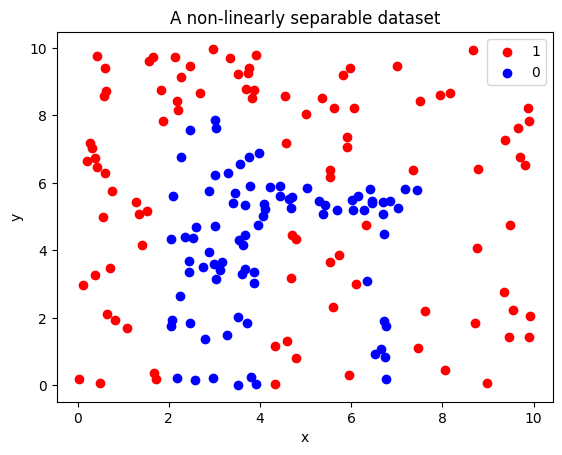

In [5]:
from graph import points_4, labels_4


training_data, validation_data, training_labels, validation_labels = train_test_split(
    points_4, labels_4, train_size = 0.8, test_size = 0.2, random_state = 100
)

plt.scatter(points_4[labels_4 == 1][:, 0], points_4[labels_4 == 1][:, 1], color = "r")
plt.scatter(points_4[labels_4 == 0][:, 0], points_4[labels_4 == 0][:, 1], color = "b")
plt.legend(["1", "0"])
plt.title("A non-linearly separable dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [11]:
# Task 1
classifier = SVC(kernel = 'rbf', gamma = 1)

# Task 2
classifier.fit(training_data, training_labels)

# Task 3
print("Gamma =  1  : ", classifier.score(validation_data, validation_labels))

# Task 4
classifier = SVC(kernel = 'rbf', gamma = 10)
classifier.fit(training_data, training_labels)
print("Gamma = 10  : ", classifier.score(validation_data, validation_labels))

# Task 5
classifier = SVC(kernel = 'rbf', gamma = 0.1)
classifier.fit(training_data, training_labels)
print("Gamma =  0.1: ", classifier.score(validation_data, validation_labels))

Gamma =  1  :  0.8888888888888888
Gamma = 10  :  0.8333333333333334
Gamma =  0.1:  0.7777777777777778
